# TP1: Visualisation des surfaces

### Import des modules de base

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Modules pour la visualisation 3D

In [2]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.tri import Triangulation

## Question 1
On veut représenter la surface d'équation $z(x,y)=x^2+y^2$

a. Ecrire un script qui génère des coordonnées X,Y de points en 2D. Les valeurs seront à chaque fois comprises dans l'intervalle $[-1,1]$. Vous utiliserez la fonction meshgrid dont vous lirez évidemment la documentation.

b. Afficher ces points sur un graphique en 2D en donnant une couleur différente à chaque colonne de X et Y. Vous utiliserez la fonction scatter dont vous lirez la documentation.

c. Calculer les valeurs Z correspondant aux coordonnées X et Y.

d. Afficher la surface à l'aide de la méthode plot_surface de matplotlib. Vous consulterez l'aide:
https://matplotlib.org/mpl_toolkits/mplot3d/tutorial.html#surface-plots

e. Ecrire une fonction générique qui fasse cette visualisation. L'en tête sera la suivante

In [3]:
def f2v(x,y):
    return x**2+y**2

# define linear spaces with the same number of elements
x = np.linspace(-1,1,20)
y = np.linspace(-1,1,20)

# get meshgrid
xx , yy = np.meshgrid(x, y, sparse=False, indexing='xy')



zs = np.array(f2v(np.ravel(xx), np.ravel(yy)))
Z = zs.reshape(xx.shape)



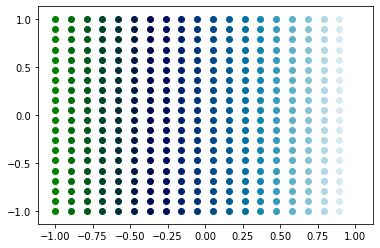

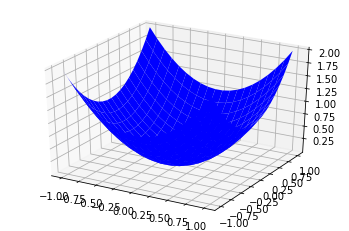

In [4]:
import matplotlib.cm as cm
from matplotlib.colors import Normalize
from matplotlib import colors as col

def visualisationSurface(X,Y,Z):
    # plot x axis as image
    t = np.arange(len(X))
    colors = cm.ocean(np.linspace(0, 1, len(Y)))
    
    for i, c in zip(range(len(Y)), colors):
        plt.scatter(X[:,i], Y[:,i], color=c)


    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(xx, yy, Z, rstride=1, cstride=1, color='b', shade=0)
    plt.show()

visualisationSurface(xx,yy,Z)

## Question 2
On veut représenter la sphère de centre $(0,0,0)$ et de rayon $1$.

a. Générer des coordonnées THETA,PHI de points dont les valeurs sont comprises respectivement entre $[-\pi/2,\pi/2]$ et $[0,2\pi]$.

b. En déduire les coordonnées X,Y,Z, de la sphère à l'aide des formules de paramétrisation sphérique.

c. Visualiser la sphère à l'aide de la fonction que vous avez écrite à la question 1.

d. Visualiser maintenant les points de la sphère discrète en donnant une couleur différente à chaque colonne de X, Y et Z. 

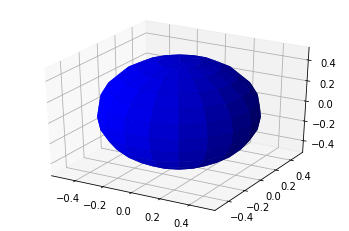

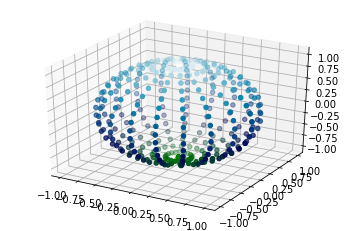

In [5]:


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

THETA = np.linspace(0, 2 * np.pi, 19)
PHI = np.linspace(0, np.pi, 13)

x = 0.5 * np.outer(np.cos(THETA), np.sin(PHI))
y = 0.5 * np.outer(np.sin(THETA), np.sin(PHI))
z = 0.5 * np.outer(np.ones(np.size(THETA)), np.cos(PHI))
ax.plot_surface(x, y, z, rstride=1, cstride=1, color='b', shade=1)

plt.show()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

THETA, PHI = np.mgrid[-np.pi/2:np.pi/2:20j,0:2*np.pi:20j]
x = np.cos(THETA)*np.cos(PHI)
y = np.cos(THETA)*np.sin(PHI)
z = np.sin(THETA)
colors = cm.ocean(np.linspace(0, 1, len(z)))
for i, c in zip(range(len(z)), colors):
    ax.scatter(x[i,:], y[i,:], z[i,:], color=c)
"""
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(x,y,z)
"""
plt.show()




## Question 3
On veut représenter les différents types de surface vues en cours selon les signes de leur courbures principales. Pour cela on va visualiser sur une même figure les surfaces données par l'équation $z(x,y)=\lambda_1 x^2 + \lambda_2 y^2$ lorsque $\lambda_1$ et $\lambda_2$ parcourent l'ensemble discret $\{-1,0,1 \}$.

a. On va utiliser la fonction subplots de matplotlib. Combien faudra-t-il afficher de sous-figures ?

b. Ecrire une fonction sous le modèle suivant qui renvoie les valeurs de Z en fonction des valeurs de X,Y et des deux paramètres $\lambda_1$ et $\lambda_2$.

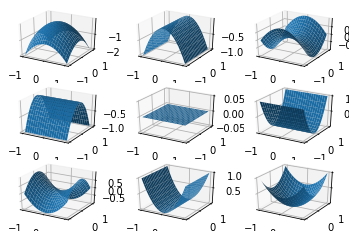

In [6]:
def quadric(X,Y,lambda1,lambda2):
    return lambda1*X**2+lambda2*Y**2
  

# define linear spaces with the same number of elements
x = np.linspace(-1,1,20)
y = np.linspace(-1,1,20)

# get meshgrid
xx , yy = np.meshgrid(x, y, sparse=False, indexing='xy')


fig = plt.figure()
k=1
for l1 in [-1,0,1]:
    for l2 in [-1,0,1]:
        ax = fig.add_subplot(3,3,k,projection='3d')
        ax.plot_surface(xx,yy,quadric(xx,yy,l1,l2))
        k +=1
        

plt.show()
    

c. Ecrire le script qui affiche les différentes sous-figures

# Question 4
On va se familiariser ici avec la visualisation de maillages triangulés en utilisant mplot3d mais aussi la librairie open3d.

a. Sur l'exemple de votre choix, utiliser la fonction Triangulation qui s'applique à deux coordonnées X et Y et renvoie un objet Tri. Comment sont stockés dans Tri les points et les triangles du maillage ? Combien y-en-a-t-il dans les deux cas ?

b. Utiliser la fonction plot_trisurf pour afficher la surface triangulée en ajoutant une couleur sur les arrêtes. Là encore vous regarderez la documentation de cette fonction:
https://matplotlib.org/mpl_toolkits/mplot3d/tutorial.html#tri-surface-plots

c. On s'intéresse maintenant aux fonctionnalités de la librairie open3d qu'on importera comme suit:

In [3]:
import open3d as o3d
from open3d import geometry

Un maillage peut se créer de la façon suivante:

In [ ]:
Mesh=geometry.TriangleMesh()
xyz = np.zeros((np.size(x), 3))
xyz[:, 0] = np.reshape(x, -1)
xyz[:, 1] = np.reshape(y, -1)
xyz[:, 2] = np.reshape(z, -1)

Mesh.vertices = o3d.utility.Vector3dVector(xyz)
Mesh.triangles =  o3d.utility.Vector3iVector(points.triangles)
mesh_sphere = o3d.geometry.TriangleMesh.create_sphere(radius=1.0)
mesh_sphere.compute_vertex_normals()


#Mesh.paint_uniform_color([0.1, 0.1, 0.7])
"""
img = geometry.Image((z * 255).astype(np.uint8))
img = o3d.io.read_image("./Lena.png")
Mesh.vertex_colors = o3d.utility.Vector3dVector(img)
print(np.asarray(Mesh.triangles))
"""

o3d.visualization.draw_geometries([Mesh])

Les points se trouvent dans Mesh.vertices et les triangles dans Mesh.triangle. Vérifier que ces deux champs sont vides. Vous devez aussi constater que le type de ces champs ne correspond pas à des tableaux numpy. En utilisant les méthodes o3d.open3d.Vector3dVector et o3d.open3d.Vector3iVector, faites la mise à jour de l'objet Mesh avec des données de votre choix.

Visualisez enfin le maillage à l'aide de draw_geometries

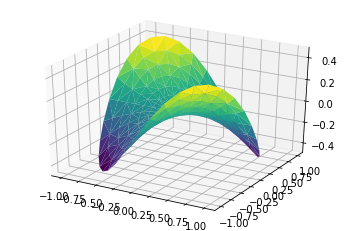

In [14]:
n_radii = 8
n_angles = 36

# Make radii and angles spaces (radius r=0 omitted to eliminate duplication).
radii = np.linspace(0.125, 1.0, n_radii)
angles = np.linspace(0, 2*np.pi, n_angles, endpoint=False)

# Repeat all angles for each radius.
angles = np.repeat(angles[..., np.newaxis], n_radii, axis=1)


x = np.append(0, (radii*np.cos(angles)).flatten())
y = np.append(0, (radii*np.sin(angles)).flatten())

# Compute z to make the pringle surface.
z = np.sin(-x*y)

fig = plt.figure()
ax = fig.gca(projection='3d')

ax.plot_trisurf(x, y, z,linewidth=0.2, antialiased=True,cmap='viridis', edgecolor='none')

plt.show()


[[  0  89  97]
 [ 81  89   0]
 [  0 113 121]
 ...
 [266 265 257]
 [266 274 273]
 [273 265 266]]


Text(0.5, 1.0, 'triplot of Delaunay triangulation')

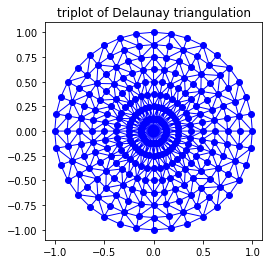

In [54]:
points = Triangulation(x, y, mask=None)
print(points.triangles)


fig1, ax1 = plt.subplots()
ax1.set_aspect('equal')
ax1.triplot(points, 'bo-', lw=1)
ax1.set_title('triplot of Delaunay triangulation')


d. Il est possible d'ajouter une texture (=image) sur une surface en mettant à jour le champ vertex_colors de l'objet Mesh. En choisissant pour ce champ des valeurs bien choisis (aléatoires ou autre), procéder ensuite à l'affichage.